# Logistic Regression With Python

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Check out the data

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(['User ID'],axis=1,inplace=True)


In [9]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


# Exploratory Data Analysis

Text(0.5, 0, 'Age')

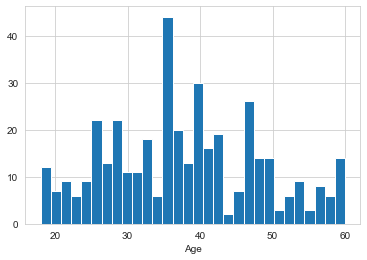

In [10]:
sns.set_style("whitegrid")
plt.hist(df["Age"],bins=30)
#df['Age'].hist(bins=30)
plt.xlabel("Age")

Create a jointplot showing EstimatedSalary versus Age.

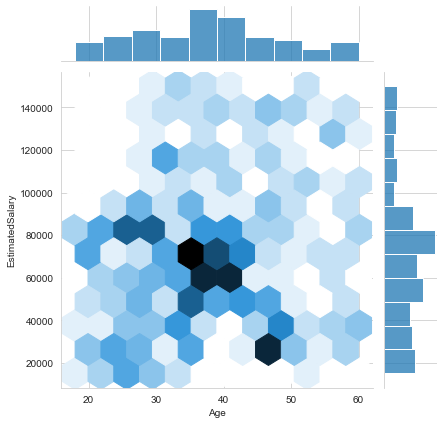

In [11]:
sns.jointplot(x="Age",y="EstimatedSalary",data=df,kind="hex")

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

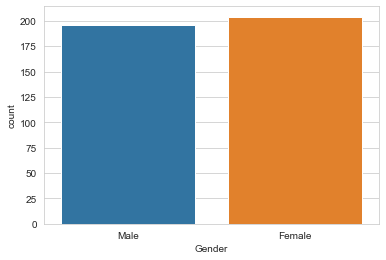

In [12]:
sns.countplot(df["Gender"])

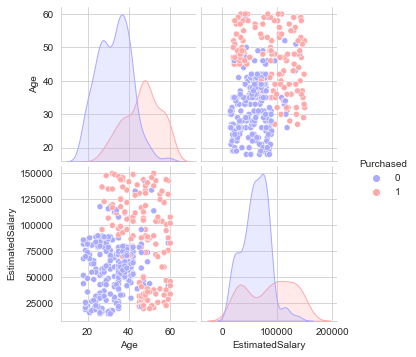

In [13]:
sns.pairplot(df,hue="Purchased",palette='bwr')

# Training a Logistic Regression Model

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x=df[["Age","EstimatedSalary"]]
y=df["Purchased"]

In [16]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

# Creating and Training the Model

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
logmodel=LogisticRegression()

In [21]:
logmodel.fit(X_train,y_train)

LogisticRegression()

# Predictions and Evaluations

In [22]:
predictions=logmodel.predict(X_test)

Create a classification report for the model.

In [23]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score, precision_score, recall_score, f1_score

In [24]:
matrix = confusion_matrix(y_test,predictions,labels = logmodel.classes_)
print(matrix)

tp, fn, fp, tn = confusion_matrix(y_test,predictions,labels=[1,0]).reshape(-1)

[[57  8]
 [11 24]]


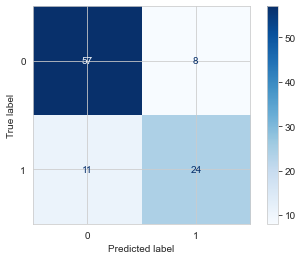

In [25]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=logmodel.classes_)
conf_matrix.plot(cmap=plt.cm.Blues)
plt.show()

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        65
           1       0.75      0.69      0.72        35

    accuracy                           0.81       100
   macro avg       0.79      0.78      0.79       100
weighted avg       0.81      0.81      0.81       100



In [29]:
logmodel.predict_proba(X_test)

array([[0.97005983, 0.02994017],
       [0.66536767, 0.33463233],
       [0.08476291, 0.91523709],
       [0.91883031, 0.08116969],
       [0.9408405 , 0.0591595 ],
       [0.16895316, 0.83104684],
       [0.9910484 , 0.0089516 ],
       [0.70994725, 0.29005275],
       [0.98857846, 0.01142154],
       [0.99117507, 0.00882493],
       [0.18775298, 0.81224702],
       [0.02858815, 0.97141185],
       [0.55358696, 0.44641304],
       [0.88143873, 0.11856127],
       [0.69065861, 0.30934139],
       [0.95184343, 0.04815657],
       [0.22853036, 0.77146964],
       [0.39907728, 0.60092272],
       [0.71191725, 0.28808275],
       [0.5545182 , 0.4454818 ],
       [0.1757901 , 0.8242099 ],
       [0.03243682, 0.96756318],
       [0.57031511, 0.42968489],
       [0.71289925, 0.28710075],
       [0.61649413, 0.38350587],
       [0.99889546, 0.00110454],
       [0.99872747, 0.00127253],
       [0.06959271, 0.93040729],
       [0.44979704, 0.55020296],
       [0.10384248, 0.89615752],
       [0.

In [30]:
logmodel.score(X_train,y_train)

0.85

In [31]:
accuracy_score(y_test,predictions)

0.81

In [32]:
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test,predictions)))
print('Error Rate: ',(fp+fn)/(tp+tn+fn+fp))
print('Sensitivity (Recall or True positive rate) :',tp/(tp+fn))
print('Specificity (True negative rate) :',tn/(fp+tn))
print('Precision (Positive predictive value) :',tp/(tp+fp))
print('False Positive Rate :',fp/(tn+fp))


Accuracy: 0.81
Error Rate:  0.19
Sensitivity (Recall or True positive rate) : 0.6857142857142857
Specificity (True negative rate) : 0.8769230769230769
Precision (Positive predictive value) : 0.75
False Positive Rate : 0.12307692307692308
